In [1]:
import numpy as np

class NormalEquationRegressor:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.theta = None

    def fit(self):
        n, m = self.X.shape
        X_aug = np.vstack([np.ones(m), self.X])
        xtx = X_aug @ X_aug.T
        xy = X_aug @ self.Y
        self.theta = np.linalg.inv(xtx) @ xy
        return self.theta

    def predict(self, X=None):
        if self.theta is None:
            raise ValueError("El modelo no está ajustado. Llama a 'fit()' primero.")
        if X is None:
            X = self.X
        m = X.shape[1]
        X_aug = np.vstack([np.ones(m), X])
        return self.theta @ X_aug

# Uso:
# modelo = NormalEquationRegressor(X, Y)
# theta = modelo.fit()
# Y_pred = modelo.predict(X_test)


In [2]:
import numpy as np

class normal_equation():
    def __init__(self, X, Y):
        m, n = X.shape  # m=samples, n=features
        X_bias = np.hstack([np.ones((m, 1)), X])  # agrega la columna de unos
        self.X = X_bias
        self.Y = Y

        xtx = self.X.T @ self.X
        xty = self.X.T @ self.Y
        self.theta = np.linalg.pinv(xtx) @ xty

    def predict(self, X):
        m = X.shape[0]
        X_bias = np.hstack([np.ones((m, 1)), X])
        return X_bias @ self.theta

# Uso ejemplo:
# model = normal_equation(X, Y)
# y_pred = model.predict(X)



<a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/Laboratorio_05_NormalEquations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Normal equation
Se puede encontrar una solucion exacta para theta sin necesidad de emplear el gradiente descente de la sesiones pasadas, para ellos se puede encontrar el valor minimo de theta y a partir de alli determinar el valor de theta que minimiza J.

Los pasos para esta minimizacion se dejan como tarea, y pueden ser calculados según lo siguiente:

Si J es la funcion de coste dada por:

\begin{equation}
J(\theta_1,\theta_2,\theta_3, ...,\theta_n )=\frac{1}{2m} \sum_{i = 1}^m (\Theta^{T} X - \hat{y}^{(i)})^2
\end{equation}


Demostrar que:

- $J(\theta_1,\theta_2,\theta_3, ...,\theta_n ) = \frac{1}{2m} (\Theta ^ T X - y^T) (\Theta ^ T X - y^T)^T$

- $J= (\Theta ^T X) (\Theta ^T X)^T - 2(\Theta ^T X)Y  + Y^TY $


- $ \nabla _{\theta} J = \frac{1}{m} (2 X(X^T \Theta) -2XY)$




### Demostración 1: Expresión matricial de J

Nota: las demostraciones las hice a mano y con ayuda de IA las convertie en latex

Partimos de la función de coste:

$$J(\theta_1,\theta_2,\theta_3, ...,\theta_n )=\frac{1}{2m} \sum_{i = 1}^m (\Theta^{T} X^{(i)} - y^{(i)})^2$$

En notación matricial, si tenemos:
- $X \in \mathbb{R}^{n \times m}$ (donde cada columna es un ejemplo de entrenamiento $X^{(i)}$)
- $y \in \mathbb{R}^{m \times 1}$ (vector de valores objetivo)
- $\Theta \in \mathbb{R}^{n \times 1}$ (vector de parámetros)

Entonces $\Theta^T X \in \mathbb{R}^{1 \times m}$ contiene todas las predicciones.

El error de cada ejemplo es $(\Theta^T X - y^T)$, donde $y^T \in \mathbb{R}^{1 \times m}$.

Elevando al cuadrado cada componente usando la propiedad $z^T z = \sum_i z_i^2$:

$$\sum_{i = 1}^m (\Theta^{T} X^{(i)} - y^{(i)})^2 = (\Theta^T X - y^T)(\Theta^T X - y^T)^T$$

Por lo tanto:

$$J(\theta_1,\theta_2,\theta_3, ...,\theta_n ) = \frac{1}{2m} (\Theta ^ T X - y^T) (\Theta ^ T X - y^T)^T \quad \square$$

---

### Demostración 2: Expansión de J

Expandimos el producto:

$$J = \frac{1}{2m} (\Theta^T X - Y^T)(\Theta^T X - Y^T)^T$$

Recordando las dimensiones:
- $\Theta^T X \in \mathbb{R}^{1 \times m}$
- $Y^T \in \mathbb{R}^{1 \times m}$

Aplicando distributividad del producto matricial:

$$J = \frac{1}{2m} \left[ (\Theta^T X)(\Theta^T X)^T - (\Theta^T X)(Y^T)^T - Y^T(\Theta^T X)^T + Y^T(Y^T)^T \right]$$

Simplificando:
- $(Y^T)^T = Y$
- $Y^T(\Theta^T X)^T$: Notamos que $(\Theta^T X)^T = X^T \Theta$, entonces $Y^T X^T \Theta$ es un escalar
- Usando la propiedad $a^T b = b^T a$ para escalares: $Y^T(\Theta^T X)^T = (\Theta^T X)(Y^T)^T = (\Theta^T X) Y$

Por lo tanto:

$$J = \frac{1}{2m} \left[ (\Theta^T X)(\Theta^T X)^T - 2(\Theta^T X) Y + Y^T Y \right]$$

Multiplicando por $2m$ para obtener la expresión sin el factor de normalización:

$$2m J = (\Theta^T X)(\Theta^T X)^T - 2(\Theta^T X) Y + Y^T Y$$

O simplemente (considerando solo la parte variable):

$$(\Theta^T X)(\Theta^T X)^T - 2(\Theta^T X) Y + Y^T Y \quad $$

---

### Demostración 3: Gradiente de J respecto a $\Theta$

Calculamos el gradiente de $J$ respecto a $\Theta$.

$$J = \frac{1}{2m} \left[ (\Theta^T X)(\Theta^T X)^T - 2(\Theta^T X) Y + Y^T Y \right]$$

Recordando las dimensiones:
- $\Theta \in \mathbb{R}^{n \times 1}$, $\Theta^T \in \mathbb{R}^{1 \times n}$
- $X \in \mathbb{R}^{n \times m}$, $X^T \in \mathbb{R}^{m \times n}$
- $Y \in \mathbb{R}^{m \times 1}$

El término $Y^T Y$ no depende de $\Theta$, por lo que su gradiente es cero: $\nabla_\Theta (Y^T Y) = 0$.

**Para el primer término:** $(\Theta^T X)(\Theta^T X)^T$

Desarrollando:
$$(\Theta^T X)(\Theta^T X)^T = (\Theta^T X)(X^T \Theta) = \Theta^T (X X^T) \Theta$$

Notamos que $A = X X^T \in \mathbb{R}^{n \times n}$ es una matriz simétrica.

Usando la propiedad: $\nabla_\Theta \Theta^T A \Theta = 2 A \Theta$ (donde $A$ es simétrica):

$$\nabla_\Theta \left[ \Theta^T X X^T \Theta \right] = 2 (X X^T) \Theta = 2 X (X^T \Theta)$$

**Para el segundo término:** $-2(\Theta^T X) Y$

Notamos que $(\Theta^T X) Y$ es un escalar. Escribiéndolo explícitamente:
$$(\Theta^T X) Y = \sum_{i=1}^m (\Theta^T X)_i Y_i = \sum_{i=1}^m \Theta^T X^{(i)} Y_i = \Theta^T \sum_{i=1}^m X^{(i)} Y_i = \Theta^T (X Y)$$

Donde $X Y \in \mathbb{R}^{n \times 1}$ es el vector que resulta de multiplicar cada columna $X^{(i)}$ por $Y_i$ y sumar.

Usando la propiedad: $\nabla_\Theta \Theta^T b = b$:

$$\nabla_\Theta \left[ -2 (\Theta^T X) Y \right] = -2 \nabla_\Theta [\Theta^T (X Y)] = -2 (X Y)$$

**Combinando:**

$$\nabla_\Theta J = \frac{1}{2m} \left[ 2 X (X^T \Theta) - 2 X Y \right] = \frac{1}{m} \left[ X (X^T \Theta) - X Y \right]$$

O equivalentemente:

$$\nabla_\Theta J = \frac{1}{m} (2 X (X^T \Theta) - 2 X Y) \quad \square$$

---

### Demostración 4: Ecuación Normal

Para encontrar el mínimo, igualamos el gradiente a cero:

$$\nabla_\Theta J = 0$$

$$\frac{1}{m} (2 X (X^T \Theta) - 2 X Y) = 0$$

Simplificando:

$$X (X^T \Theta) - X Y = 0$$

$$X X^T \Theta = X Y$$

**Nota:** Con las dimensiones especificadas ($X \in \mathbb{R}^{n \times m}$, donde cada columna es un ejemplo), tenemos que $X X^T \in \mathbb{R}^{n \times n}$.

Asumiendo que $X X^T$ es invertible (lo cual ocurre cuando $X$ tiene filas linealmente independientes, es decir, cuando tenemos al menos $n$ ejemplos diferentes):

$$\Theta = (X X^T)^{-1} X Y$$

Sin embargo, en la notación estándar donde $X \in \mathbb{R}^{m \times n}$ (cada fila es un ejemplo de entrenamiento, con $m$ ejemplos y $n$ características), la ecuación normal toma la forma:

$$X^T X \Theta = X^T y$$

De donde se obtiene:

$$\Theta = (X^T X)^{-1} X^T y \quad \square$$

**Observación:** La diferencia entre $(X X^T)^{-1} X Y$ y $(X^T X)^{-1} X^T y$ radica en la convención de notación:
- En la primera, $X$ tiene ejemplos como columnas ($X \in \mathbb{R}^{n \times m}$)
- En la segunda (estándar), $X$ tiene ejemplos como filas ($X \in \mathbb{R}^{m \times n}$)




Para encontrar el valor minimo de \theta,  $\nabla _{\theta} J = 0$,

- $\Theta = (X^T X)^{-1} X^T y$



En este caso,tenemos que:

sea $X \in R^{n\times m}$ ,  $X^T \in R^{m\times n}$

sea $Y \in R^{m \times 1}$,  $Y^T \in R^{1 \times m}$

sea $\Theta \in R^{n \times 1}$, $\Theta^T \in R^{1 \times n}$




Para la demostracion anterior emplee las siguientes propiedades:

- $z^T z= \sum_i z_i^2$
- $a^T b = b^Ta$
- $\nabla _x b^T x = b$
- $\nabla _x  x^T A x = 2Ax$

donde a, b, x son matrices, $\nabla_x$ es la derivada respecto al vector x, y A es una matriz simétrica





Para encontrar el valor minimo de \theta,  $\nabla _{\theta} J = 0$,

- $\Theta = (X^T X)^{-1} X^T y$








1. Para los datos del laboratorio anterior aplicar la ecuacion normal.
2. Tomar el dataset de las casas de Boston y construir un modelo de regresión mutivariada.

```
# Tomar los datos de las casas de boston y hacer una regresion lineal tomando
# el average number of rooms per dwelling.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

df = pd.DataFrame({"mean_":target, "rm":data[:,5]})

```

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [50]:
# Tomar los datos de las casas de boston y hacer una regresion lineal tomando
# el average number of rooms per dwelling.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data_array = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Convertir data en un DataFrame de features
data = pd.DataFrame(data_array, columns=feature_names)
target = raw_df.values[1::2, 2]
data_array.shape

(506, 13)

In [5]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


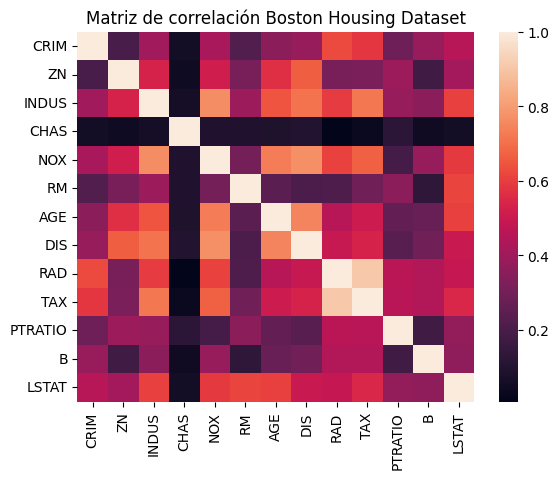

In [7]:
corr = data.corr()

sns.heatmap(np.abs(corr))
plt.title("Matriz de correlación Boston Housing Dataset")
plt.show()


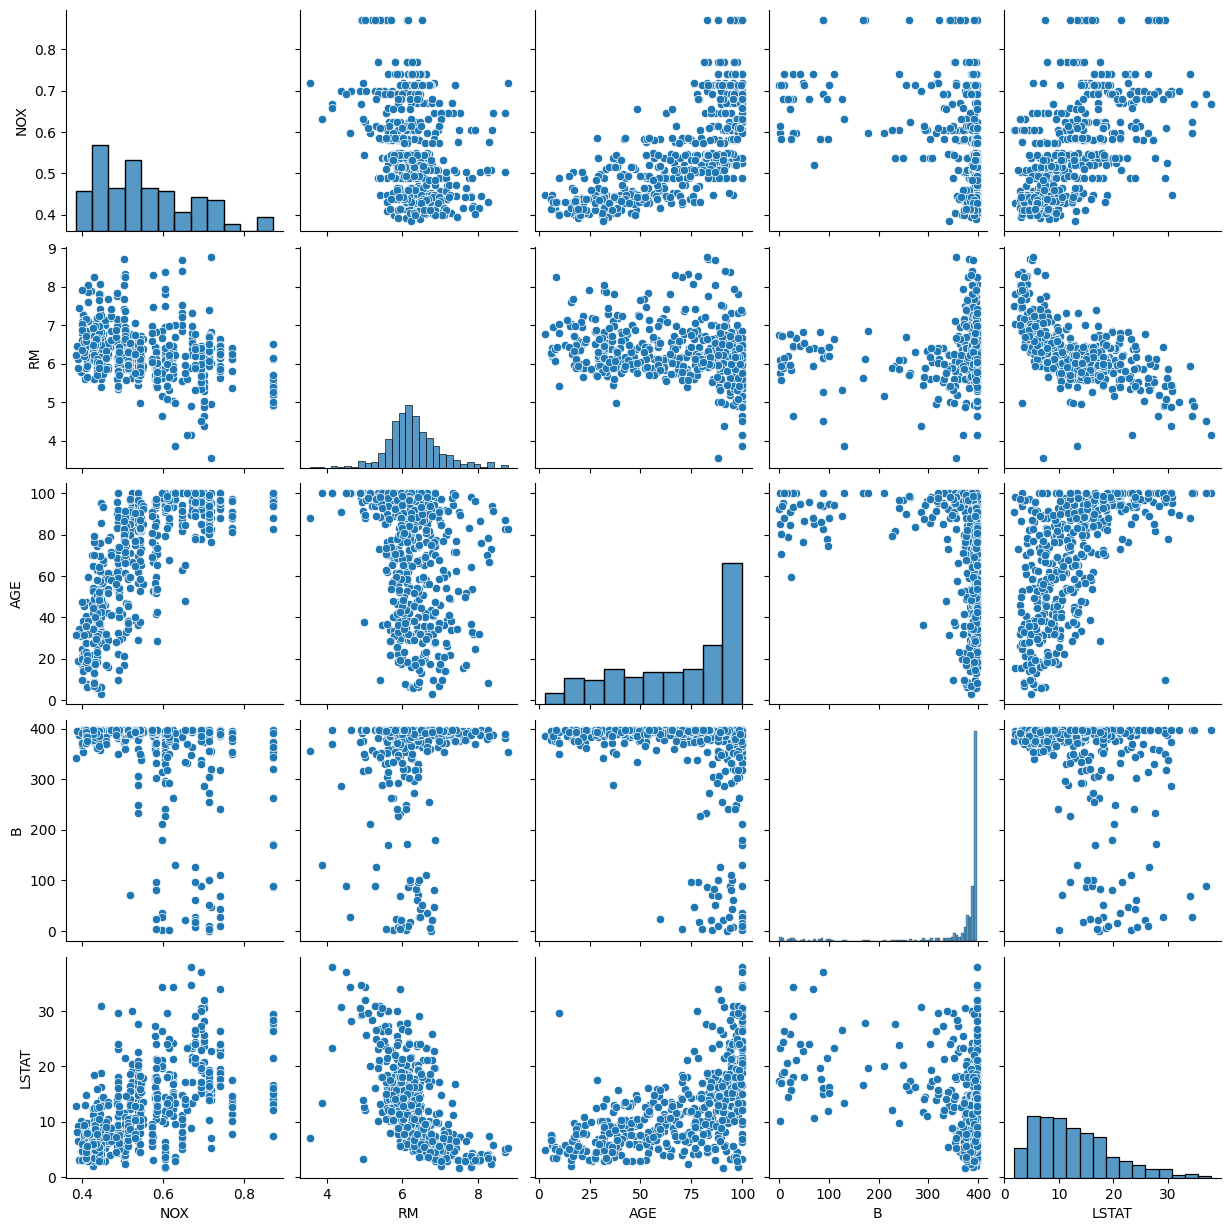

In [8]:
cols = ['NOX', 'RM', 'AGE', 'B', 'LSTAT']

sns.pairplot(data[cols])

In [18]:

class NormalEquation:
    def __init__(self, X, y):
        """
        Implementa la ecuación normal para regresión lineal:
        θ = (X Xᵀ)⁻¹ X 

        Parámetros:
        ------------
        X : ndarray 
        y : ndarray 
  
        """

        if y.ndim == 1:
            y = y.reshape(-1, 1)
        n, m = X.shape 
        X = np.vstack([np.ones(m), X])  

        xtx = X @ X.T        
        xy = X @ y           
        self.theta = np.linalg.inv(xtx) @ xy  # (n+1, 1)

    def predict(self, X_new):
        m = X_new.shape[1]
        X_new = np.vstack([np.ones(m), X_new])
        return (self.theta.T @ X_new).flatten()


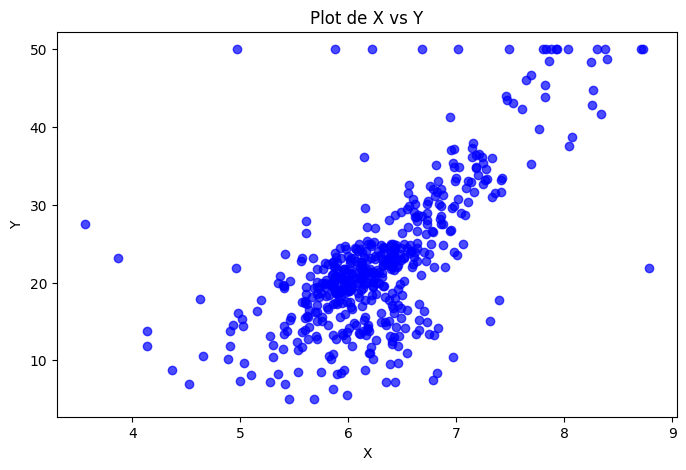

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X.flatten(), Y.flatten(), color='blue', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot de X vs Y')
plt.show()


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


cols = ['NOX', 'RM', 'AGE', 'B', 'LSTAT']
X = data[cols].values  # (m_features, n_features)
Y = target.reshape(-1, 1)
Y = data['CRIM'].values.reshape(-1,1)

# Estandarizar X e Y primero
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)
Y = scaler_y.fit_transform(Y).ravel()


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Transponer para NormalEquation (espera (n_features, n_samples))
X_train = X_train.T
X_test = X_test.T

modelo = NormalEquation(X_train, Y_train)

# Predicciones sobre test
y_pred = modelo.predict(X_test)

mse = np.mean((Y_test - y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((Y_test - y_pred) ** 2) / np.sum((Y_test - np.mean(Y_test)) ** 2))

print(f"MSE : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R2 : {r2:.4f}")


MSE : 0.3768
RMSE : 0.6138
R2 : 0.4950


# Intepretación Probabilistica.

Supongamos que tenemos una caracteristica $x_i$ con m valores de entrenamiento, si asumimos que cada valor $y_i$ presenta una dispersión gaussiana $\epsilon_i$, cada $y_i$ podrá tener el siguiente valor:

$y^{i} = \Theta^T X^{(i)} + \epsilon_i$

Asumiendo ademas que el ruido gaussiando es aleatorio y esta distribuido de forma identica, con media cero y varianza $\sigma$, tenemos que la probabilidad de que la cantidad y tenga  dispersion $\epsilon_i$ es:
\begin{equation}
p(\epsilon^{(i)})=\frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{ \left( \epsilon^{(i)}\right)^2 }{2\sigma ^2}}
\end{equation}

Escribiendo, lo anterior en terminos de la probabilidad de obtener un valor de $y^{i}$ dado un $x^{i}$ parametrizado por $\theta$ obtenemos que:


\begin{equation}
p_i(y^{i}|x^{i};\theta)=\frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{ \left( y_i - \Theta^T X^{(i)} \right)^2 }{2\sigma ^2}}
\end{equation}



Si ausmimos independencia estadística de cada $\epsilon^{(i)}$, la probabilidad $L(\theta)$ asociada a toda la distribución de puntos viene dada por:

\begin{equation}
\cal{L}(\theta) = p(\vec{y}|X;\theta)=\prod_{i=1}^{n} p_i(y^{i}|x^{i};\theta)
\end{equation}



\begin{equation}
\cal{L}(\theta) =\prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{ \left( y_i - \Theta^T X^{(i)} \right)^2 }{2\sigma ^2}}
\end{equation}

para tener la mejor estimación posible de los valores que se deben elegir de  $\theta$, se escogeran los parámetros que generan la mayor probabilidad de ocurrencia según las observaciones, es decir, aquellos valores para el cual $L(\theta)$ es máximo, si aplicamos el logaritmo natural antes de máximar tenemos que:

\begin{equation}
\ln \cal{L}(\theta) = \cal{l}(\theta) = \ln \left[\prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{ \left( y_i - \Theta^T X^{(i)} \right)^2 }{2\sigma ^2}} \right]
\end{equation}


Después de un par de pasos se puede encontrar que:

\begin{equation}
\cal{l}(\theta) = n\ln \frac{1}{\sqrt{2\pi\sigma}} - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y^{i}-\Theta^T X^{i})^2
\end{equation},

maximar $\cal{l(\theta)}$ equivale a encontrar donde  $\nabla_{\theta} \cal{l(\theta)} = 0$. Lo anterior muestra por que la elección de minimos cuadrados puede ser una buena eleccción para el analisis de los datos.